In [50]:
import matplotlib.pyplot as plt 
import pandas as pd

In [51]:
italy_fouls = pd.read_csv("../prepped_data/italy_fouls.csv")
italy_fbm = pd.read_csv("../prepped_data/italy_fbm.csv")

In [52]:
italy_shots = pd.read_csv("../prepped_data/italy_shots.csv")
italy_sbm = pd.read_csv("../prepped_data/italy_sbm.csv")

In [53]:
italy_fouls = italy_fouls.drop(columns=["Unnamed: 0"])
italy_fbm = italy_fbm.drop(columns=["Unnamed: 0"])
italy_shots = italy_shots.drop(columns=["Unnamed: 0"])
italy_sbm = italy_sbm.drop(columns=["Unnamed: 0"])

In [54]:
teams_id = pd.read_csv("../srcd_data/teams.csv")
teams_id.head()

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


In [55]:
team_fouls = [teams_id.loc[teams_id["wyId"] == row[1]["teamId"]]["name"].to_string().split(' ')[-1] for row in italy_fouls.iterrows()]
team_shots = [teams_id.loc[teams_id["wyId"] == row[1]["teamId"]]["name"].to_string().split(' ')[-1] for row in italy_shots.iterrows()]

In [56]:
italy_fouls.insert(4, "team", team_fouls)
italy_shots.insert(4, "team", team_shots)

In [57]:
italy_fouls.head(3), italy_shots.head(3)

(   eventId subEventName  matchId  teamId      team    eventSec  eventMin
 0        2         Foul  2575959    3172  Atalanta   33.869510       1.0
 1        2         Foul  2575959    3172  Atalanta  123.664460       2.0
 2        2         Foul  2575959    3172  Atalanta  463.985339       8.0,
    eventId subEventName  matchId  teamId      team    eventSec  eventMin
 0       10         Shot  2575959    3172  Atalanta  193.924279       3.0
 1       10         Shot  2575959    3158      Roma  250.843152       4.0
 2       10         Shot  2575959    3158      Roma  633.577774      11.0)

## plotting functions 

In [58]:
def plt_by_team(tbl, metric, color, grid, n_axis, filter):
    team_events = tbl.groupby("team").apply(lambda x: filter(x["eventMin"]), include_groups=False)
    
    teams = team_events.keys()
    events = team_events.values

    scatter = grid[n_axis].scatter(
        x=teams, 
        y=events,
        c=color,
        label=metric) 
    
    return scatter, teams

def plt_by_match(tbl, metric, color,  grid, n_axis, portion): 

    scatter = grid[n_axis].scatter(
        x=tbl["matchId"],
        y=tbl[f'{portion} game {metric} density'],
        c=color
    ) 
    return scatter

def plt_by_two(tbls, metrics, colors, grid, n_axis, filter):
    events_1 = tbls[0].groupby("team").apply(lambda x: filter(x["eventMin"]), include_groups=False)
    events_2 = tbls[1].groupby("team").apply(lambda x: filter(x["eventMin"]), include_groups=False)

    teams = events_1.keys()
    event_1 = events_1.values
   
    event_2 = events_2.values

    scatter = grid[n_axis].scatter(
        x=event_1, 
        y=event_2,
        c=colors,
     ) 
    
    return scatter

def plt_by_match_two(tbl, metric, color,  grid, n_axis, portion): 

    scatter = grid[n_axis].scatter(
        x=tbl[0][f'{portion} game {metric[0]} density'],
        y=tbl[1][f'{portion} game {metric[1]} density'],
        c=color
    ) 
    return scatter

def compute_lg_density(col): 
    total = len(col) 
    lg = len(list(filter(lambda x: x >= 60, col)))
    return lg / total

def compute_eg_density(col): 
    total = len(col) 
    eg = len(list(filter(lambda x: x < 60, col)))
    return eg / total

## early game plotting

/var/folders/m7/vg3xv2x14k3c46nwr33gwxyw0000gn/T/ipykernel_25924/59504828.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)


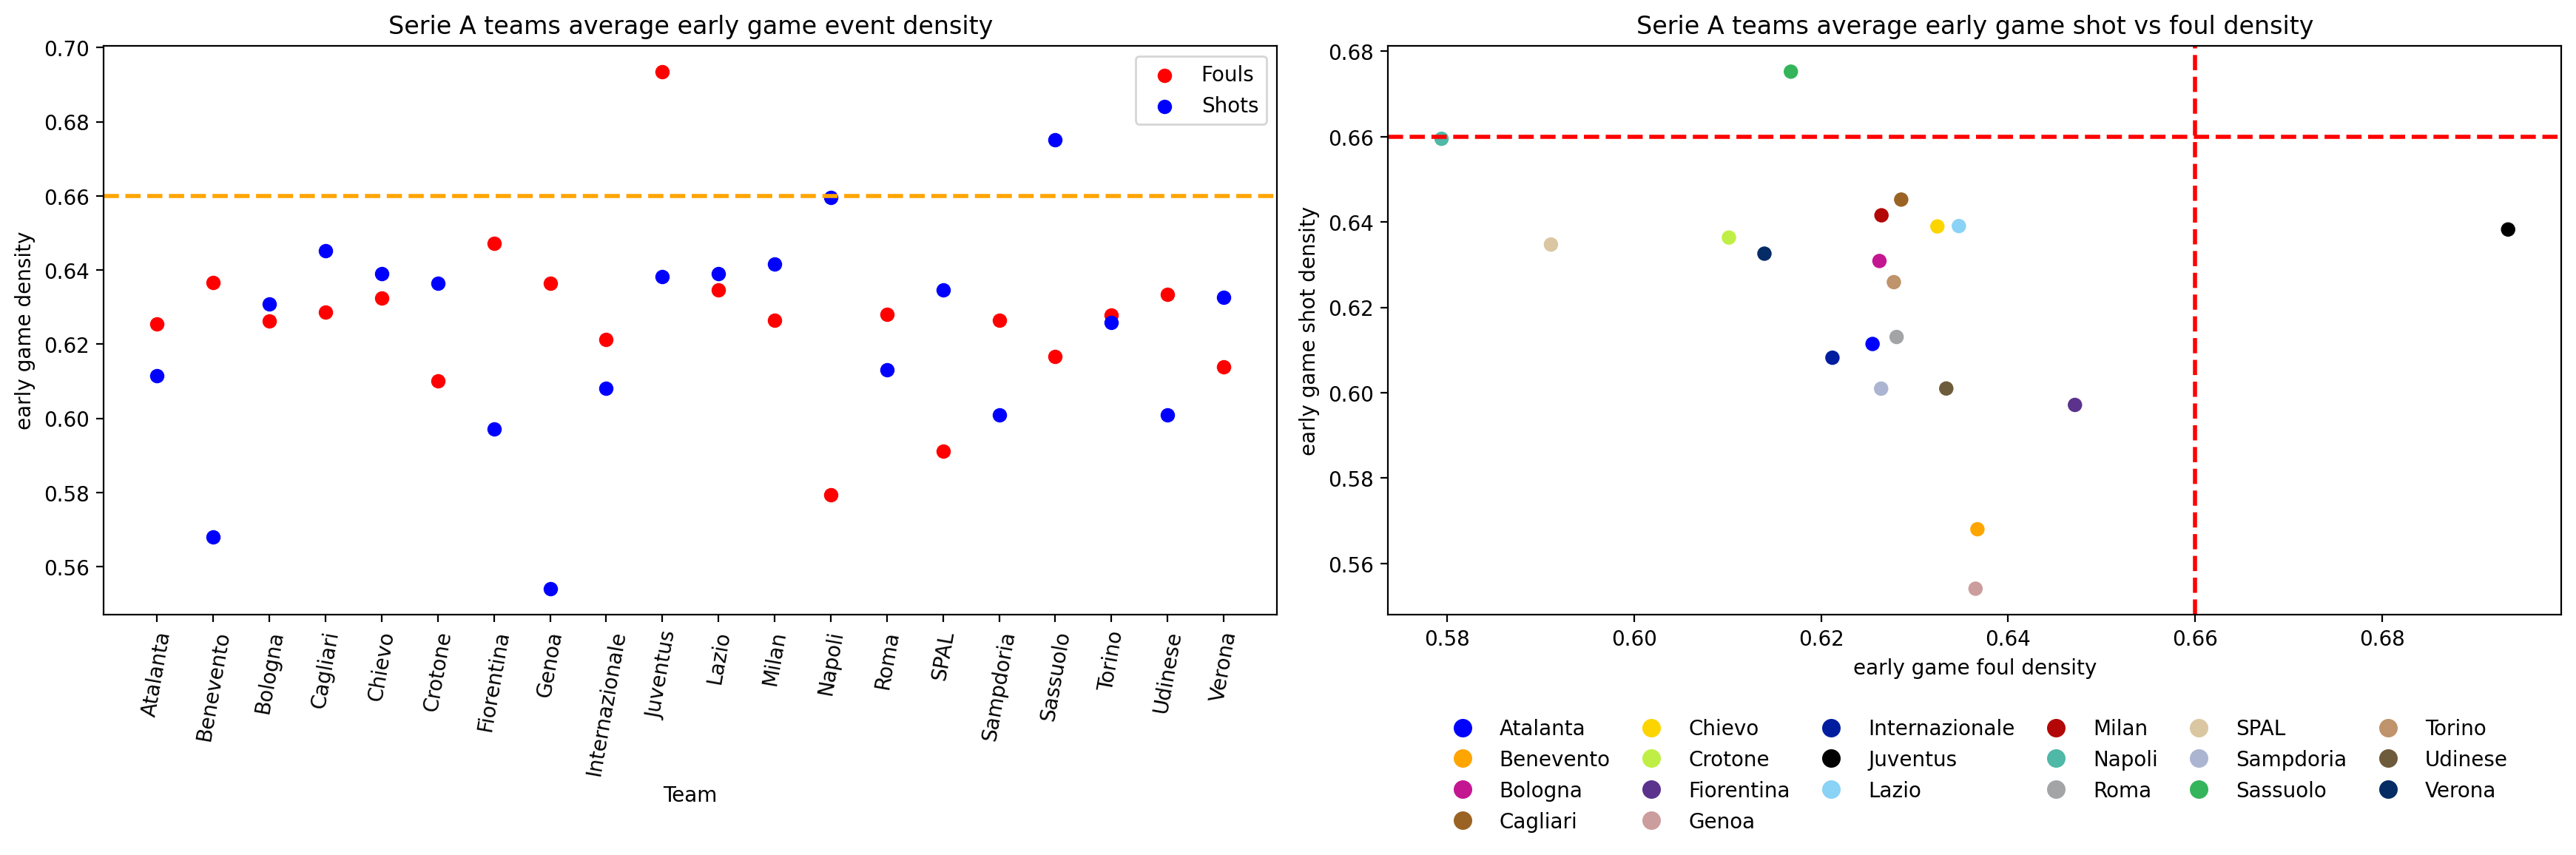

In [59]:
import numpy as np

f_width = 18
f_height = 6
fig, axes = plt.subplots(ncols=2, figsize=(f_width, f_height), dpi=200)

eg_fouls_by_team, teams = plt_by_team(italy_fouls, "foul", "red", axes, 0, compute_eg_density)
eg_shots_by_team, teams = plt_by_team(italy_shots, "shot", "blue", axes, 0, compute_eg_density)

axes[0].set_title("Serie A teams average early game event density")
axes[0].set_xlabel("Team")
axes[0].set_ylabel("early game density")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80) 
axes[0].axhline(y=0.66, color='orange', linestyle='--', linewidth=2)
axes[0].legend([eg_fouls_by_team, eg_shots_by_team], ['Fouls', 'Shots'])

team_colors = ["blue", "orange", "#c41690", "#9A6324", "#fcd501", "#bfef45", "#5b328c", "#cc9d9d", "#001da0", "black", "#8ad2f6", "#B30606", "#4fb8a6", "#a2a4a6", "#dac6a1", "#abb4d0", "#34b55b", "#bf936b", "#6e5b3b", "#052c65"]
eg_event_by_team = plt_by_two([italy_fouls, italy_shots], ["foul", "shot"], team_colors, axes, 1, compute_eg_density)

axes[1].set_title("Serie A teams average early game shot vs foul density")
axes[1].set_xlabel("early game foul density")
axes[1].set_ylabel("early game shot density")
axes[1].axvline(x=0.66, color='red', linestyle='--', linewidth=2)
axes[1].axhline(y=0.66, color='red', linestyle='--', linewidth=2)

# Create legend handles
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=team, 
                   markerfacecolor=color, markersize=10) 
                   for team, color in zip(teams, team_colors)]

# Add the legend with all teams
axes[1].legend(handles=legend_elements, 
               loc='upper center',
               bbox_to_anchor=(0.5, -0.15),
               ncol=6,
               columnspacing=1,
               frameon=False)

plt.tight_layout()
plt.savefig("gen_graphics/ege_by_team.pdf")
plt.show()


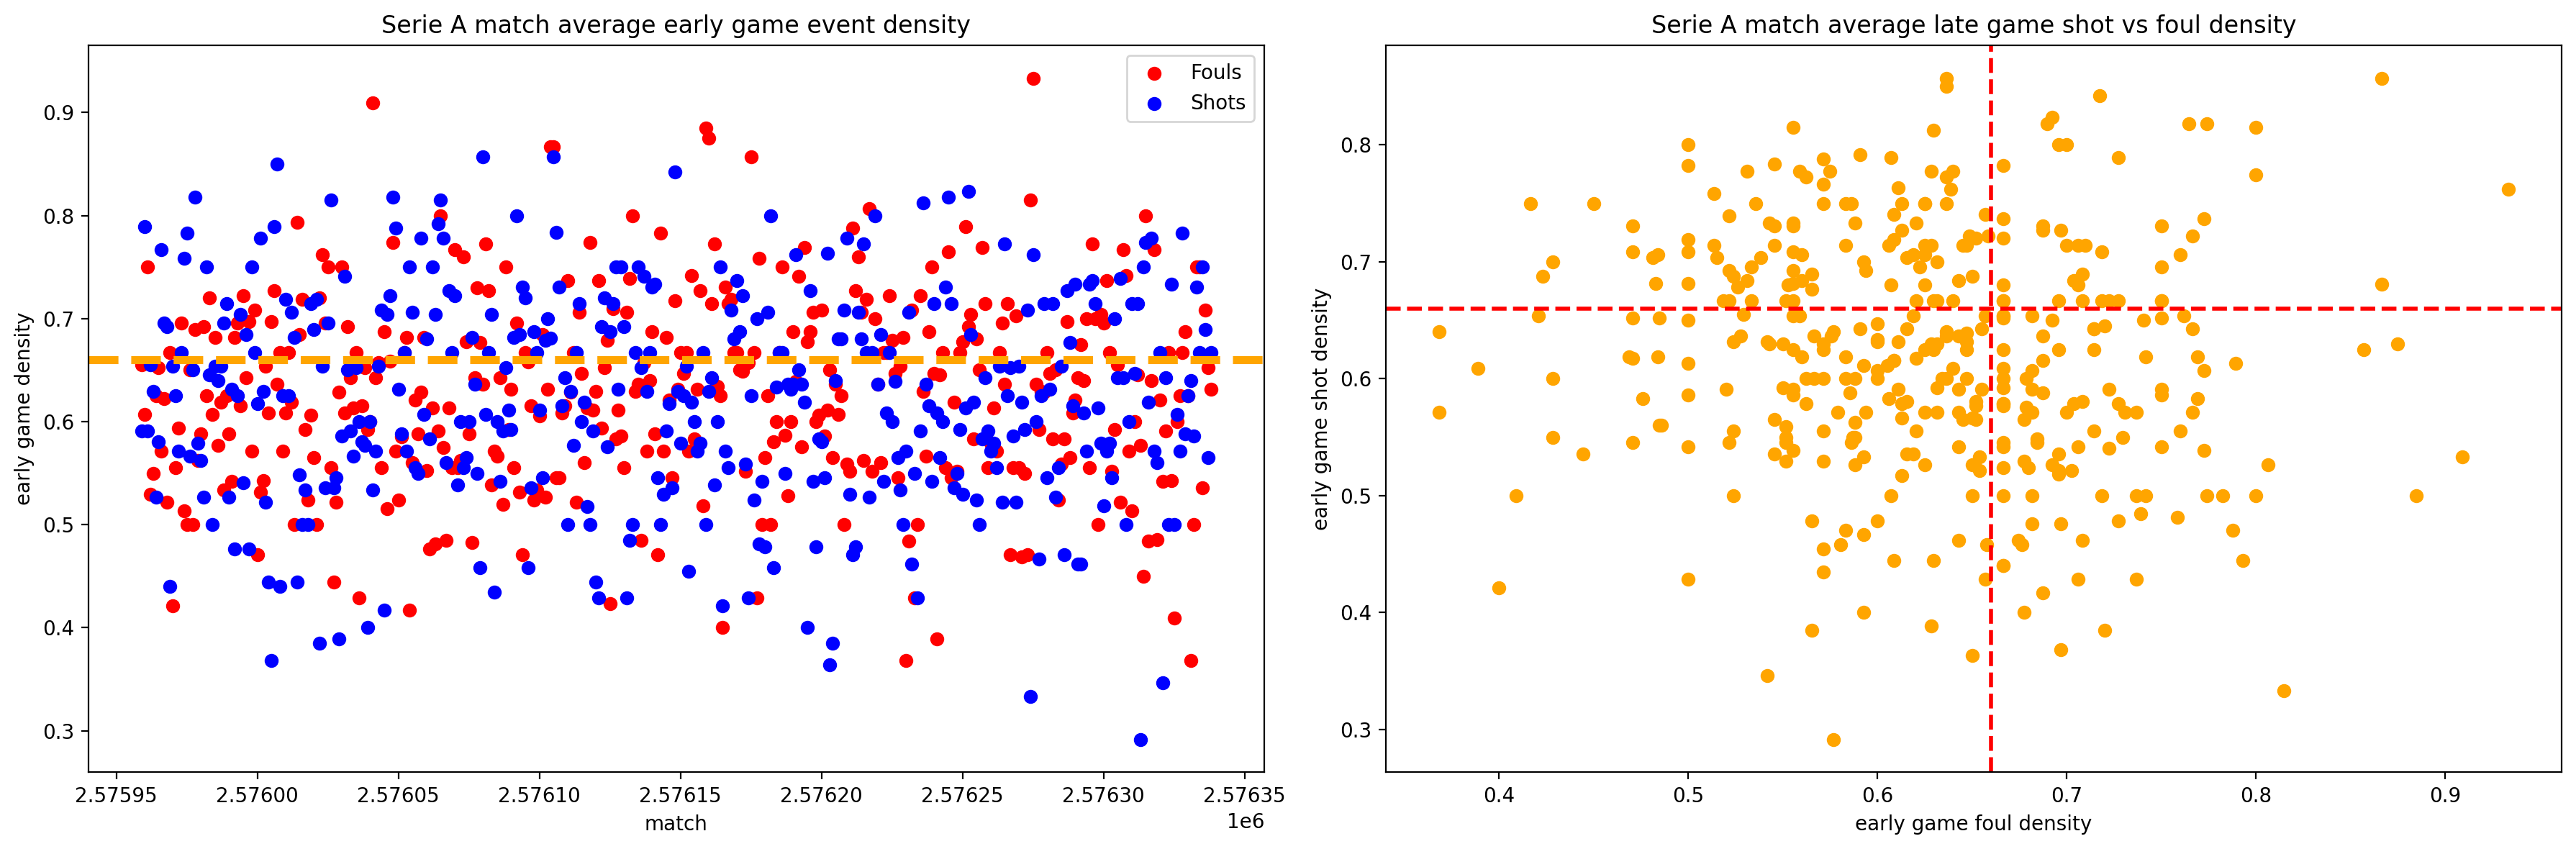

In [60]:
f_width = 18
f_height = 6
fig, axes = plt.subplots(ncols=2, figsize=(f_width, f_height), dpi=200)

eg_fouls_by_match = plt_by_match(italy_fbm, "foul", "red", axes, 0, "early")
eg_shots_by_match = plt_by_match(italy_sbm, "shot", "blue", axes, 0, "early")

axes[0].set_title("Serie A match average early game event density")
axes[0].set_xlabel("match")
axes[0].set_ylabel("early game density")
axes[0].legend([eg_fouls_by_match, eg_shots_by_match], ['Fouls', 'Shots'])
axes[0].axhline(y=0.66, color='orange', linestyle='--', linewidth=4)

eg_event_by_match = plt_by_match_two([italy_fbm, italy_sbm], ["foul", "shot"], "orange", axes, 1, "early")

axes[1].set_title("Serie A match average late game shot vs foul density")
axes[1].set_xlabel("early game foul density")
axes[1].set_ylabel("early game shot density")
axes[1].axvline(x=0.66, color='red', linestyle='--', linewidth=2)
axes[1].axhline(y=0.66, color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.savefig("gen_graphics/ege_by_match.pdf")
plt.show()

## late game plotting 

/var/folders/m7/vg3xv2x14k3c46nwr33gwxyw0000gn/T/ipykernel_25924/403920544.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)


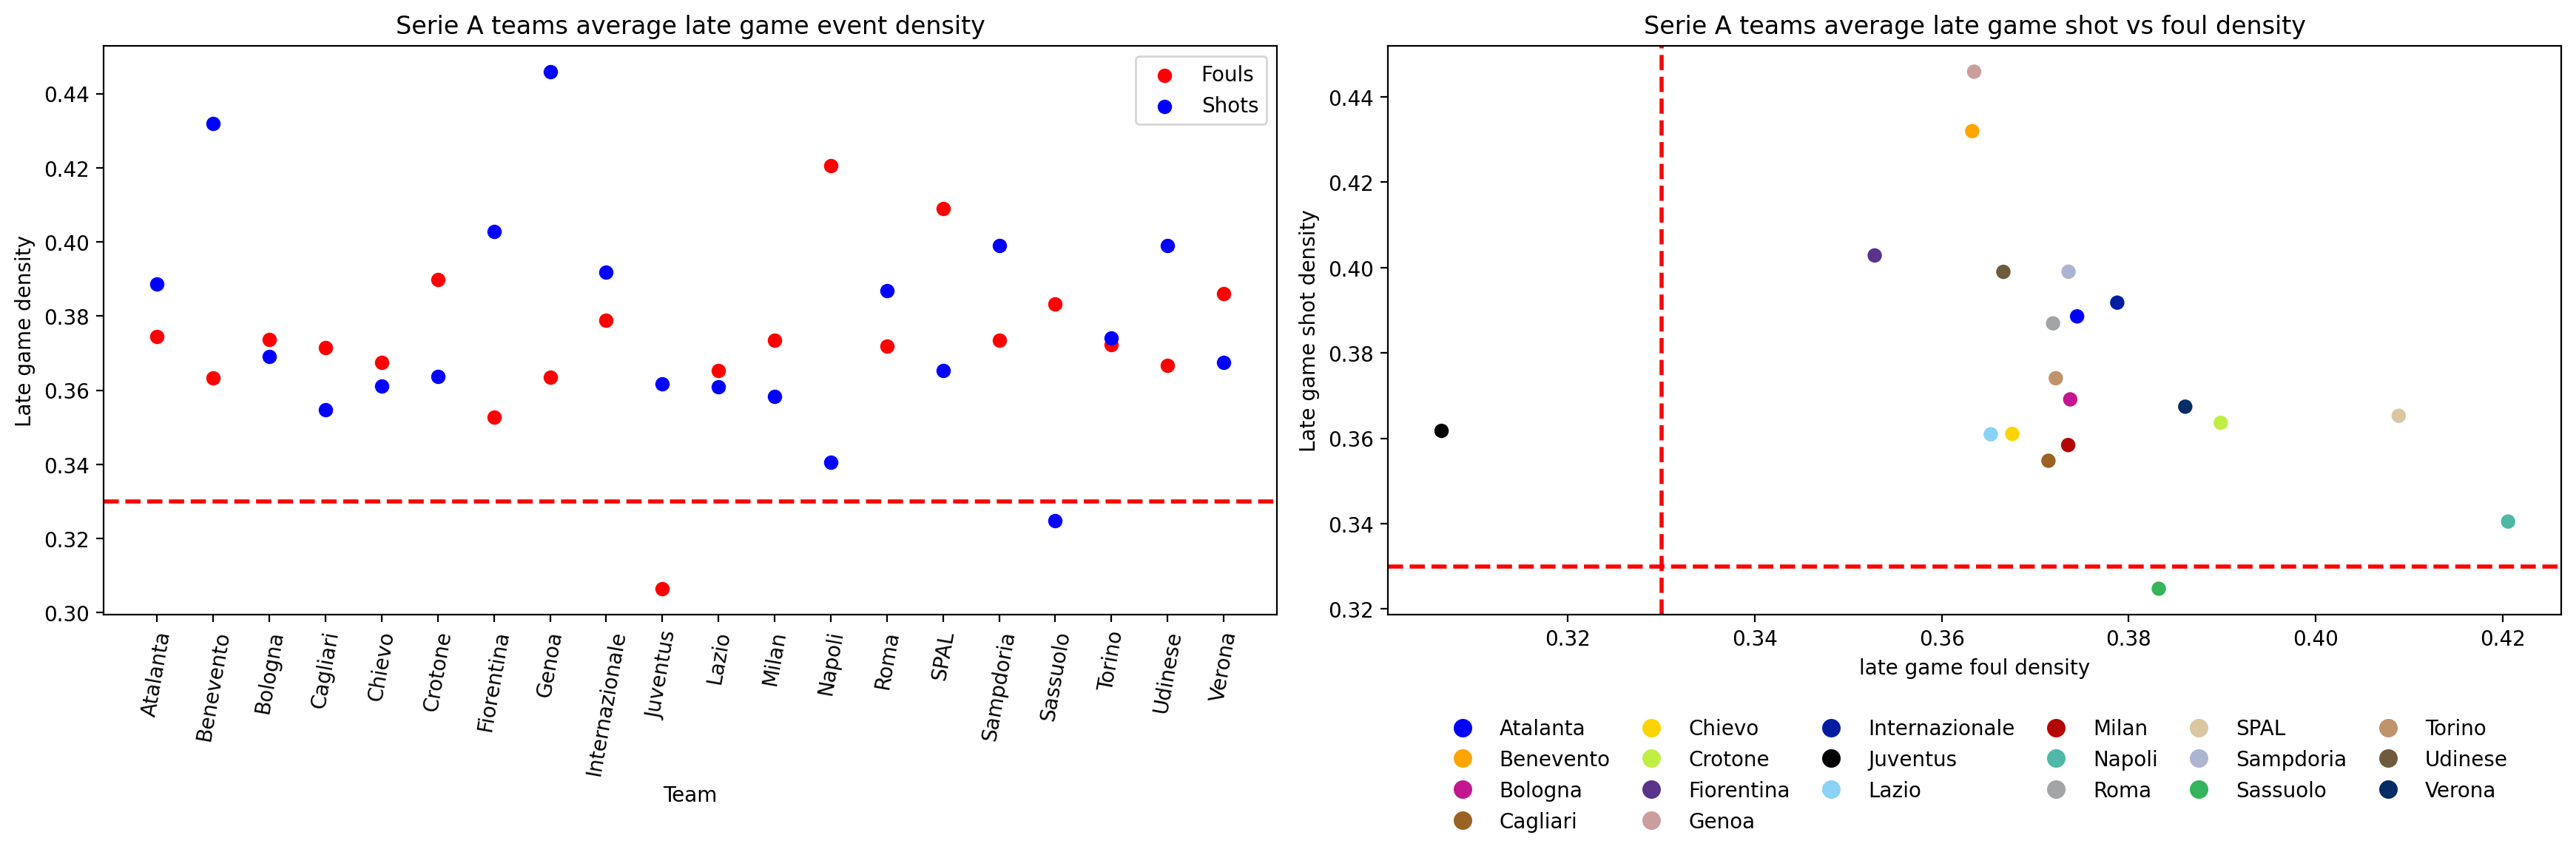

In [61]:
f_width = 18
f_height = 6
fig, axes = plt.subplots(ncols=2, figsize=(f_width, f_height), dpi=200)

lg_fouls_by_team, teams = plt_by_team(italy_fouls, "foul", "red", axes, 0, compute_lg_density)
lg_shots_by_team, teams = plt_by_team(italy_shots, "shot", "blue", axes, 0, compute_lg_density)

axes[0].set_title("Serie A teams average late game event density")
axes[0].set_xlabel("Team")
axes[0].set_ylabel("Late game density")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80) 
axes[0].legend([lg_fouls_by_team, lg_shots_by_team], ['Fouls', 'Shots'])
axes[0].axhline(y=0.33, color='red', linestyle='--', linewidth=2)

team_colors = ["blue", "orange", "#c41690", "#9A6324", "#fcd501", "#bfef45", "#5b328c", "#cc9d9d", "#001da0", "black", "#8ad2f6", "#B30606", "#4fb8a6", "#a2a4a6", "#dac6a1", "#abb4d0", "#34b55b", "#bf936b", "#6e5b3b", "#052c65"]
lg_event_by_team = plt_by_two([italy_fouls, italy_shots], ["foul", "shot"], team_colors, axes, 1, compute_lg_density)

axes[1].set_title("Serie A teams average late game shot vs foul density")
axes[1].set_xlabel("late game foul density")
axes[1].set_ylabel("Late game shot density")
axes[1].axvline(x=0.33, color='red', linestyle='--', linewidth=2)
axes[1].axhline(y=0.33, color='red', linestyle='--', linewidth=2)
# Create legend handles
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=team, 
                   markerfacecolor=color, markersize=10) 
                   for team, color in zip(teams, team_colors)]

# Add the legend with all teams
axes[1].legend(handles=legend_elements, 
               loc='upper center',
               bbox_to_anchor=(0.5, -0.15),
               ncol=6,
               columnspacing=1,
               frameon=False)

plt.tight_layout()
plt.savefig("gen_graphics/lge_by_team.pdf")
plt.show()


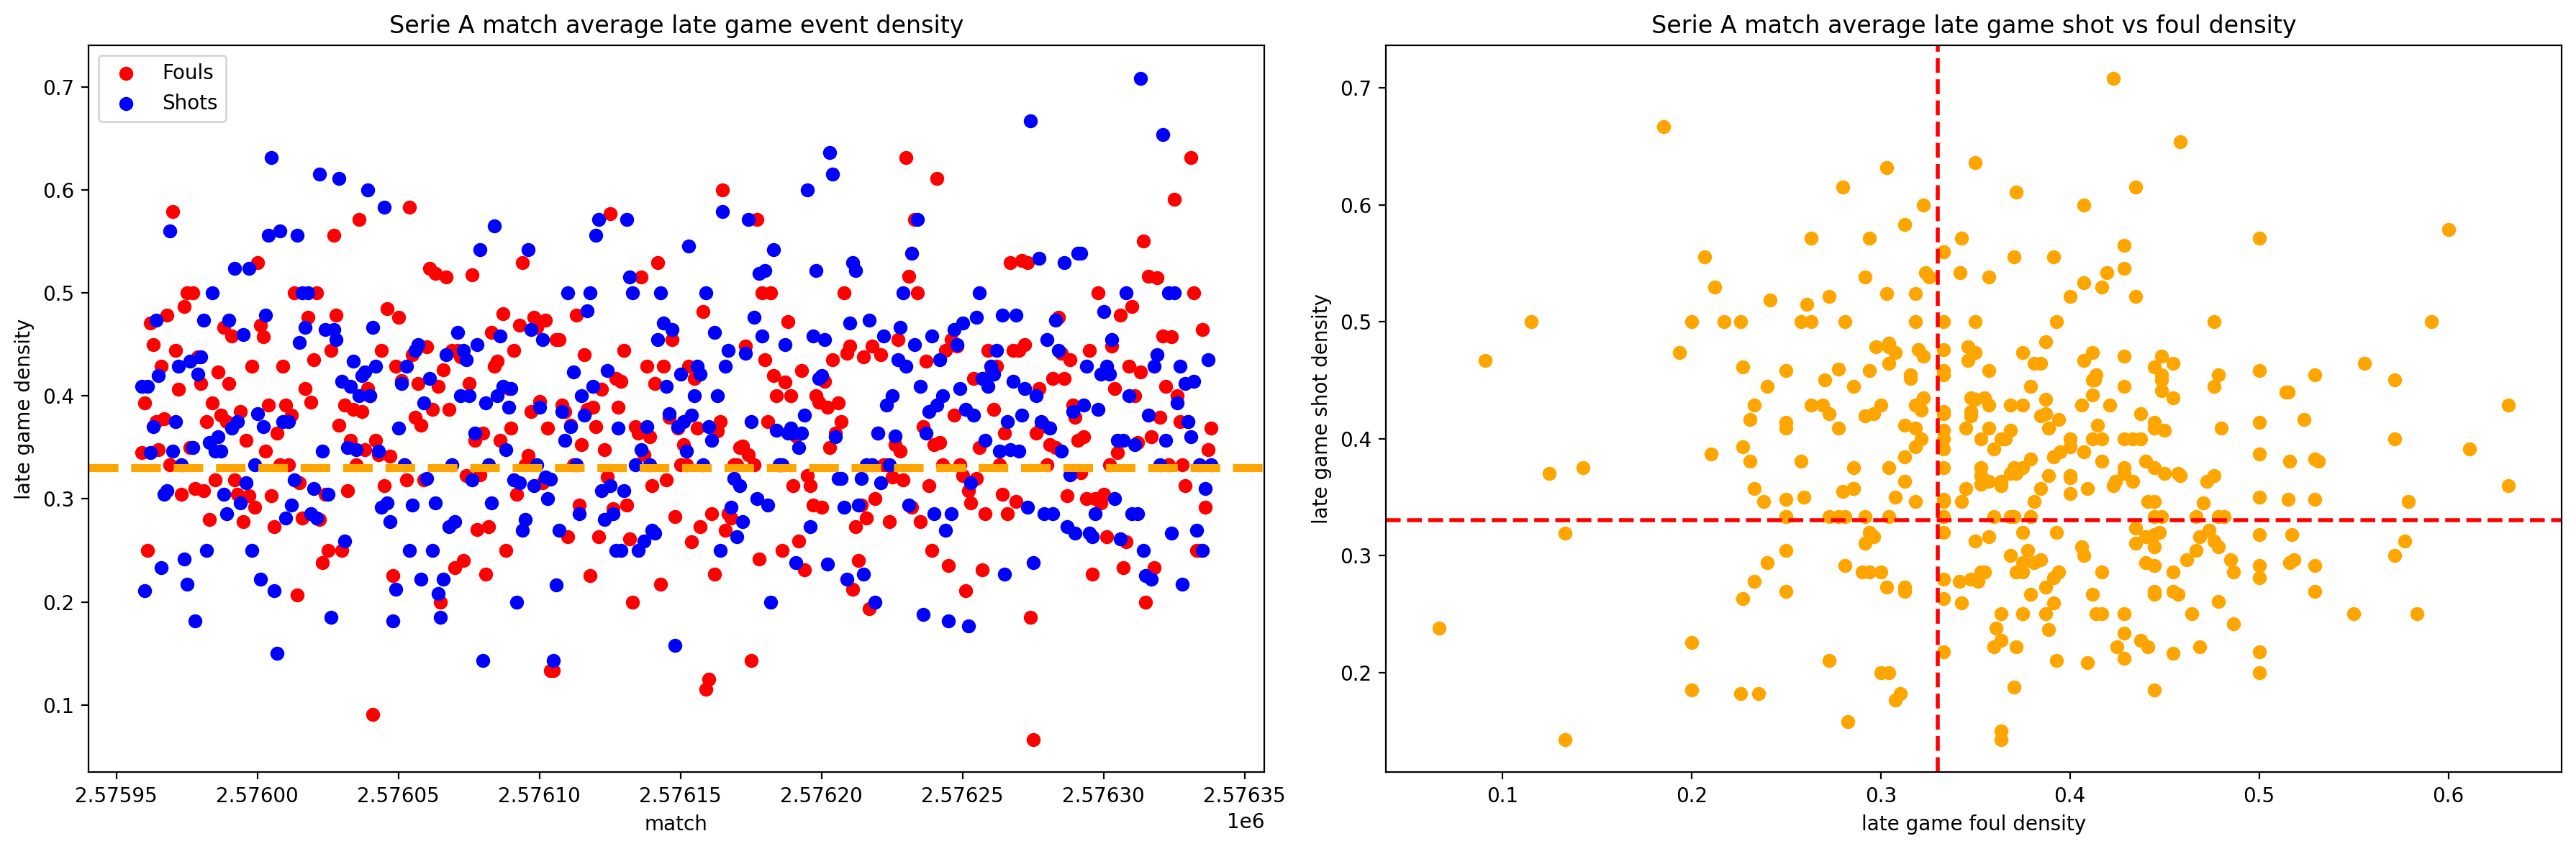

In [62]:
f_width = 18
f_height = 6
fig, axes = plt.subplots(ncols=2, figsize=(f_width, f_height), dpi=200)

lg_fouls_by_match = plt_by_match(italy_fbm, "foul", "red", axes, 0, "late")
lg_shots_by_match = plt_by_match(italy_sbm, "shot", "blue", axes, 0, "late")

axes[0].set_title("Serie A match average late game event density")
axes[0].set_xlabel("match")
axes[0].set_ylabel("late game density")
axes[0].legend([lg_fouls_by_match, lg_shots_by_match], ['Fouls', 'Shots'])
axes[0].axhline(y=0.33, color='orange', linestyle='--', linewidth=4)

lg_event_by_match = plt_by_match_two([italy_fbm, italy_sbm], ["foul", "shot"], "orange", axes, 1, "late")

axes[1].set_title("Serie A match average late game shot vs foul density")
axes[1].set_xlabel("late game foul density")
axes[1].set_ylabel("late game shot density")
axes[1].axvline(x=0.33, color='red', linestyle='--', linewidth=2)
axes[1].axhline(y=0.33, color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.savefig("gen_graphics/lge_by_match.pdf")
plt.show()